# ITCS 4152/5152 Assignment1
**Due date: 11:59 pm EST on Feb 13, 2023 (Mon.)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your UNC Charlotte (*.uncc.edu) account for coding and Google Drive to save your results.


## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip
    pip --version
    pip -V
```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'assignment1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [ ]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Replace '------' with the path such that "Surname_Givenname_UNCCID_assignment2" is your working directory
#cd '/content/gdrive/My Drive/------'

# Mount your google drive where you've saved your assignment folder
from google.colab import drive
os.chdir("/content/gdrive/My Drive/Ayalasomayajula_Ramakanth_801310383_assignment2/")

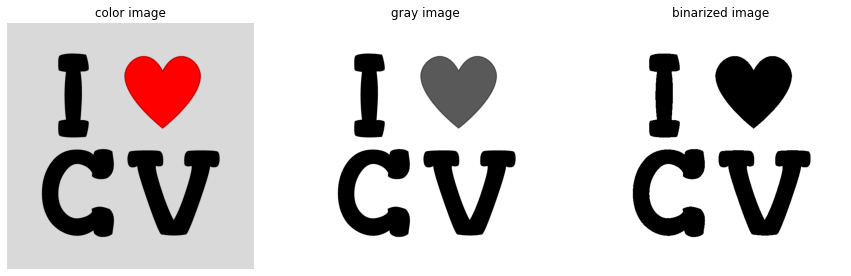

In [ ]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Start of Assignment2
---


## Problems
---

## Problem Description
---
In this assignment you will experiment with SIFT features for scene matching. You will work with the SIFT tutorial and code from the University of Toronto. In the compressed homework file, you will find the tutorial document (tutSIFT04.pdf) and a paper from the International Journal of Computer Vision (ijcv04.pdf) describing SIFT. Although the tutorial document assumes matlab implemention, you should still be able to follow the technical details in it. In addition, you are **STRONGLY** encouraged to read this paper unless you’re already quite familiar with matching and recognition using SIFT.

There are 2 problems in this assignment with a total of 100 points. Be sure to read **Submission Guidelines** below. They are important.



## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

If you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 3.4.3. If we use SIFT method directly, typically we will get this error message:

```
error: OpenCV(3.4.3) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

```

One simple way to use the OpenCV in-built function `SIFT` in Colab is to switch the version to the one from 'contrib'. Below is an example of switching OpenCV version:

1. Run the following command in one section in Colab, which has already been included in this assignment:
```
pip install opencv-contrib-python==3.4.2.16
```
2. Restart runtime by
```
Runtime -> Restart Runtime
```

Then you should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
%pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
# pip install the OpenCV version from 'contrib'
#pip install opencv-contrib-python==3.4.2.16

In [ ]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version
import os

4.6.0


## Problem 1: Match transformed images using SIFT features
{50 points} You will transform a given image, and match it back to the original image using SIFT keypoints. 

- **Step 1 (7.5pt)**. Use the function from SIFT class to detect keypoints from the given image. Plot the image with keypoints scale and orientation overlaid.

- **Step 2 (7.5pt)**. Rotate your image clockwise by 45 degrees with the `cv2.warpAffine` function. Extract SIFT keypoints for this rotated image and plot the rotated picture with keypoints scale and orientation overlaid just as in step 1.

- **Step 3 (15pt)**. Match the SIFT keypoints of the original image and the rotated imag using the `knnMatch` function in the `cv2.BFMatcher` class. Discard bad matches using the ratio test proposed by D.Lowe in the SIFT paper. Use **0.1** as the ratio in this assignment. Note that this is for display purpose only. Draw the filtered good keypoint matches on the image and display it. The image you draw should have two images side by side with matching lines across them.

- **Step 4 (10pt)**. Use the RANSAC algorithm to find the affine transformation from the rotated image to the original image. You are **not** required to implement the RANSAC algorithm yourself, instead you could use the `cv2.findHomography` function (set the 3rd parameter `method` to `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated image back using this matrix and the `cv2.warpPerspective` function. Display the recovered image.

- **Step 5 (10pt)**. You might have noticed that the rotated image from step 2 is cropped. Rotate the image without any cropping.

Hints: In case of too many matches in the output image, use the ratio of 0.1 to filter matches.

The image is a duplicate of *Table in front of window* by Pablo Picasso. See https://www.pablopicasso.org/ for more stories about Pablo Picasso and https://www.wikiart.org/en/pablo-picasso/table-in-front-of-window-1919 for more information about this work.


In [ ]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale or Color images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    # stack if the inputs are gray images
    if len(img1.shape) == 2:
      img1 = np.dstack([img1, img1, img1])
    if len(img2.shape) == 2:
      img2 = np.dstack([img2, img2, img2]) 
 
    out[:rows1, :cols1, :] = img1

    # Place the next image to the right of it
    out[:rows2, cols1:, :] = img2

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:
        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)
    # Also return the image if you'd like a copy
    return out

# Read image
img_input = cv2.imread('SourceImages/Picasso.png')

##########--WRITE YOUR CODE HERE--##########

# initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
'''
Since we don't have the keypoints and descriptors, 
we are using the sift.detectAndCompute function to find them
else we would have used the sift.compute function
'''
kp, des = sift.detectAndCompute(img_input, None)

# Draw keypoints on the image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag

''' 
Using the function drawKeypoints to draw the required keypoints on the image; 
the parameters being the original image, the key point that we calculated, 
and the descriptor along with the flag DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
'''
res1 = cv2.drawKeypoints(img_input,kp,des,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# rotate image
# use cv2.warpAffine to rotate image

'''Storing the shape of the image in x and y variables (height and width)'''
(x, y) = img_input.shape[:2]
#print(x,y)

'''After getting the shape, we find the centre of the image''' 
(cx, cy) = (y // 2, x // 2)
#(cx, cy) = (y / 2, x / 2)

'''Create a 2 dimensional matrix by rotating the image by 45 degrees from the centre of the image'''
matrix_after_rotation = cv2.getRotationMatrix2D((cx, cy), 45, 1.0)

'''
Calculating the new width and height after rotation since we do not lose any of the original image after rotation
'''
x_1 = int(x * abs(matrix_after_rotation[0,1]) + y * abs(matrix_after_rotation[0,0]))
y_1 = int(x * abs(matrix_after_rotation[0,0]) + y * abs(matrix_after_rotation[0,1]))


# Rotation matrix based on new image center
'''
Adjusting the translation component of the matrix_after_rotation for coinciding the centre
of the new image with the centre of the original image
'''
matrix_after_rotation[0, 2] += int(x_1/2) - (cx)
matrix_after_rotation[1, 2] += int(y_1/2) - (cy)

'''Rotation tranfsorm and generating the rotated image using warpAffine'''
img_input_rot =  cv2.warpAffine(img_input, matrix_after_rotation, (x_1, y_1))

# find the keypoints and descriptors on the rotated image
sift_rot = cv2.xfeatures2d.SIFT_create()

'''Using the detectAndCompute again for the rotated image to find the keypoints and descriptors'''
kp_rot, des_rot = sift_rot.detectAndCompute(img_input_rot,None)

# Draw keypoints on the rotated image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
''' Using the function drawKeypoints to draw the required keypoints on the rotated image; the parameters being the grayscale image, the key point that we calculated, and the rotated image'''
res2 = cv2.drawKeypoints(img_input_rot,kp_rot,des_rot,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

##########-------END OF CODE-------##########

# Plot result images
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB));
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB));
plt.title('rotated img')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# compute feature matching
# use the knnMatch function in the cv2.BFMatcher class
brute_force = cv2.BFMatcher()
'''Performing knnMatch on both the images' descriptors with 2 nearest neighbors to retrieve'''
matches = brute_force.knnMatch(des, des_rot, k=2)

# Apply ratio test to keep good matches; ratio=0.1
'''Storing the cv2.DMatch values in a nested list - good_matches '''
good_matches = [a for a,b in matches if a.distance < 0.1 * b.distance]

'''Visualizing the features between the two images'''
res3 = drawMatches(img_input,kp,img_input_rot,kp_rot,good_matches)#,None)#,flags=2)

##########-------END OF CODE-------##########

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB));
plt.title('matching')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# find perspective transform matrix using RANSAC
# use cv2.findHomography

'''Creating arrays to store the keypoints from the original and rotated image'''
src_pts = np.float32([kp[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_rot[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
#print(src_pts, type(src_pts))
#print(dst_pts, type(dst_pts))

'''Finding the perspective transform matrix using cv2.findHomography'''
new_matrix, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

# mapping rotataed image back with the calculated rotation matrix
# use cv2.warpPerspective
res4 = cv2.warpPerspective(img_input_rot, new_matrix, (img_input.shape[1], img_input.shape[0]))

##########-------END OF CODE-------##########


# plot result images
plt.figure(figsize=(14,8));
plt.subplot(1, 2, 1);
plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB));
plt.title('original img');
plt.axis('off');

plt.subplot(1, 2, 2);
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB));
plt.title('recovered img');
plt.axis('off');


Output hidden; open in https://colab.research.google.com to view.

## Problem 2: Scene stitching with SIFT features
{50 point} You will match and align between different views of a scene with SIFT features. 

Use `cv2.copyMakeBorder` function to pad the center image with zeros into a larger size. Extract SIFT features for all images and go through the same procedures as you did in problem 1. Your goal is to find the affine transformation between the two images and then align one of your images to the other using `cv2.warpPerspective`. Use the `cv2.addWeighted` function (or your own implementation) to blend the aligned images and show the stitched result. Examples can be found at http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html.
Use parameters **0.5 and 0.5** for alpha blending.

- **Step 1 (20pt)**. Compute the transformation from the right image to the center image. Warp the right image with the computed transformation. Stitch the center and right images with alpha blending. Display the SIFT feature matching between the center and right images like you did in problem 1. Display the stitched result (center and right image).

- **Step 2 (10pt)** Compute the transformation from the left image to the stitched image from step 1. Warp the left image with the computed transformation. Stich the left and result images from step 1 with alpha blending. Display the SIFT feature matching between the result image from step 1 and the left image like what you did in problem 1. Display the final stitched result (all three images).

- **Step 3 (20pt)**. Instead of using `cv2.addWeighted` to do the blending, implement Laplacian Pyramids to blend the two aligned images. Tutorials can be found at http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html. Display the stitched result (center and right image) and the final stitched result (all three images) with laplacian blending instead of alpha blending.

Note that for the resultant stitched image, some might have different intensity in the overlapping and other regions, namely the overlapping region looks brighter or darker than others. To get full credit, the final image should have uniform illumination.

Hints: You need to find the warping matrix between images with the same mechanism from problem 1. You will need as many reliable matches as possible to find a good homography so DO NOT use 0.1 here. A suggested value would be 0.75 in this case.

When you warp the image with cv2.warpPerspective, an important trick is to pass in the correct parameters so that the warped image has the same size with the padded_center image. Once you have two images with the same size, find the overlapping part and do the blending.

The images are the Building of Woodward Hall in UNC Charlotte.

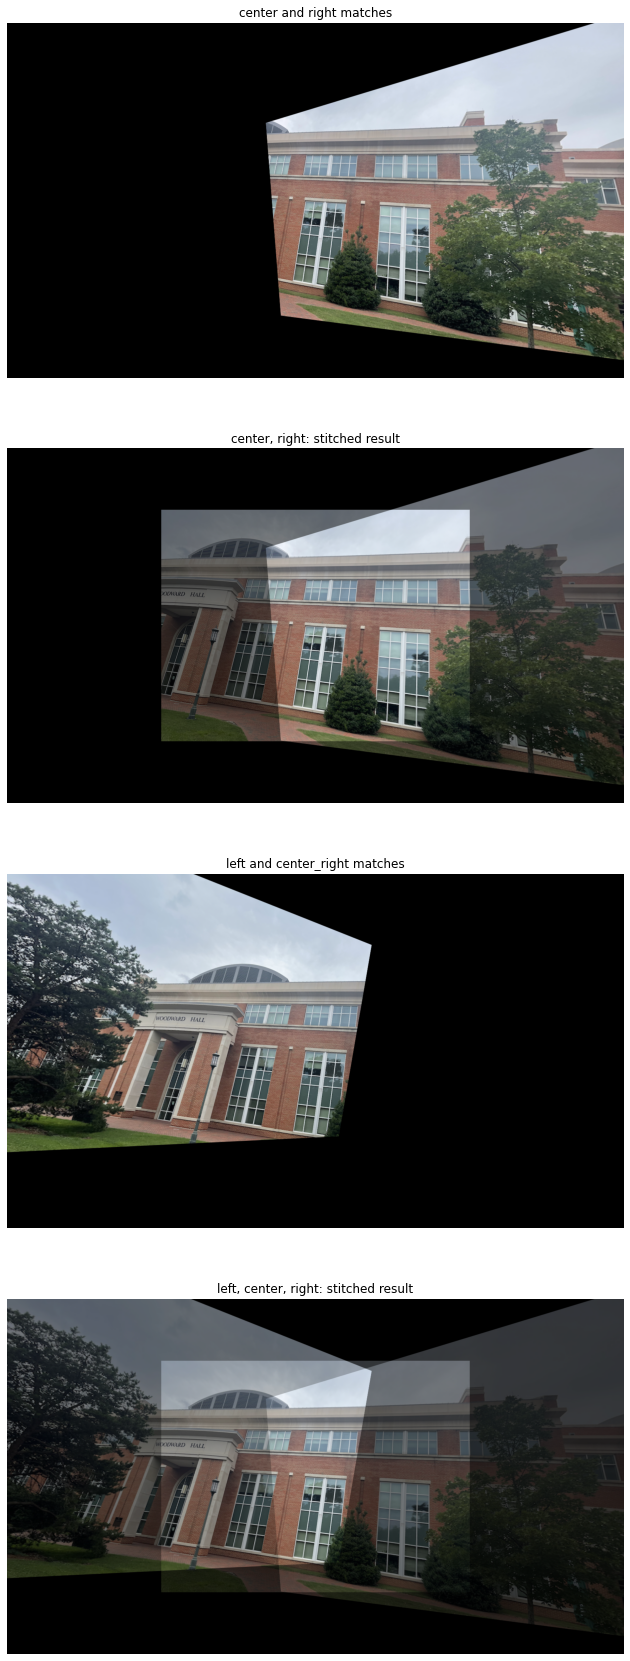

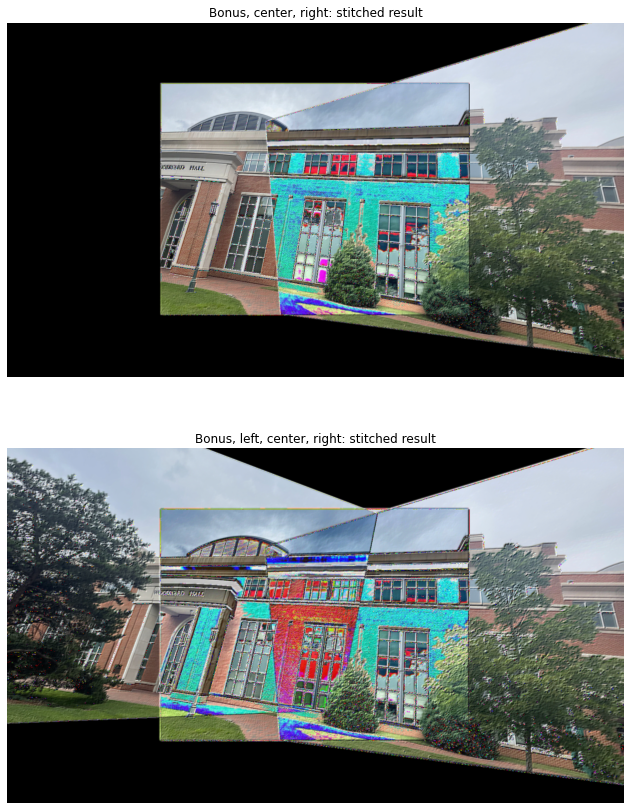

In [ ]:
imgCenter = cv2.imread('SourceImages/woodward_m.png', cv2.IMREAD_COLOR)
imgRight = cv2.imread('SourceImages/woodward_r.png', cv2.IMREAD_COLOR)
imgLeft = cv2.imread('SourceImages/woodward_l.png', cv2.IMREAD_COLOR)

# initalize the stitched image as the center image
# the following is recommended padding size, DO NOT change it 
imgCenter = cv2.copyMakeBorder(imgCenter,160,160,400,400,cv2.BORDER_CONSTANT)

def alpha_blending(img_A, img_B):    
    # Implement alpha_blending, using 0.5 and 0.5 for alphas
    ##########--WRITE YOUR CODE HERE--##########

    #Compute the weighted sum of the two images
    '''
    Using the addWeighted function, we are finding the weight addition pixel wise
    '''
    blended = cv2.addWeighted(img_A, 0.5, img_B, 0.5, 0)

    ##########-------END OF CODE-------##########
    return blended

def Laplacian_blending(img_A, img_B, num_levels=5, mask=None):
    # Implement Laplacian_blending
    # num_levels is the number of levels in the pyramids
    # assume mask is float32 [0,1], it has the same size as img_A and img_B
    # the mask indicates which parts of img_A or img_B are blended together
    # a simple example could be  
    # mask = np.hstack([np.zeros([img_A.shape[0],img_A.shape[1]//2,img_A.shape[2]], np.float32),
    # np.ones([img_B.shape[0],img_B.shape[1]//2,img_B.shape[2]], np.float32)])
    # but it depends on your choice
    # you may even skip this parameter if you always use one-half 0s and one-half 1s like the tutorial
    
    # ##########--WRITE YOUR CODE HERE--########## 

    # generate Laplacian pyramids for img_A, img_B and corresponding masks
    '''Calling the user (me) defined create_lp function to create a laplacian image for the specified image (A/B)'''
    py1 = create_lp(img_A, num_levels)
    py2 = create_lp(img_B, num_levels)

    '''Initializing the images to the lowest resolution of both images'''
    blended = py1[-1] + py2[-1]
    var = len(py1) - 2

    '''Going from lowest to the highest resolution'''
    for i in range( var, -1, -1):
        '''The image is up sampled and then resized; then the blended image is produced'''
        blended = cv2.resize(cv2.pyrUp(blended), (py1[i].shape[1], py1[i].shape[0]), interpolation = cv2.INTER_CUBIC) + py1[i] + py2[i]
    
    ##########-------END OF CODE-------##########
    return blended

'''Function to create a Laplatian image'''
def create_lp(image, num_levels):
    new_pyramid = []
    og_image = image.copy()
    for i in range(num_levels+1):
        '''Calculating the unsampled version of the current image; then resizing it'''
        lp = cv2.resize(cv2.pyrUp(og_image), (og_image.shape[1], og_image.shape[0]), interpolation = cv2.INTER_CUBIC)
        '''Storing this in the new_pyramid list'''
        new_pyramid.append((lp - og_image))
        '''Downsampling the original image for the next iteration'''
        current_img = cv2.pyrDown(og_image)
    new_pyramid.append(og_image)
    return new_pyramid


def getTransform(img1, img2):
    ##########--WRITE YOUR CODE HERE--##########

    '''Computing the sift descriptors'''
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # find all matches
    brute_force = cv2.BFMatcher()
    '''Performing knnMatch on both the images' descriptors with 2 nearest neighbors to retrieve'''
    matches = brute_force.knnMatch(des1, des2, k=2)

    # apply ratio test, use ratio = 0.75
    '''Checking the distance between the each mached keypoint between all the matches; then we store them in the list good_matches'''
    good_matches = [[a] for a,b in matches if a.distance < 0.75 * b.distance]

    '''Extracting the keypoints from kp1 and kp2 using good_matches; then it is reshaped into a 3D list '''
    source = np.float32([kp1[i[0].queryIdx].pt for i in good_matches]).reshape(-1,1,2)
    destns = np.float32([kp2[i[0].trainIdx].pt for i in good_matches]).reshape(-1,1,2)
    # find perspective transform matrix using RANSAC
    '''Computing the homography matrix between the two points source and destns'''
    trans, u = cv2.findHomography(source, destns, cv2.RANSAC, 5.0)
    return trans
            
    ##########-------END OF CODE-------##########

def perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight):

    ##########--WRITE YOUR CODE HERE--##########
    '''
    Get homography from right to center
    img_match_cr is your first output
    call getTransform to get the transformation from the right to the center image
    '''
    got_transform = getTransform(imgRight, imgCenter)

    '''
    Blend center and right
    stitched_cr is your second output, returned by alpha_blending 
    call alpha_blending
    '''
    img_match_cr = cv2.warpPerspective(imgRight, got_transform, (imgCenter.shape[1], imgCenter.shape[0]))
    stitched_cr = alpha_blending(img_match_cr, imgCenter)

    '''
    Get homography from left to stitched center_right
    img_match_lcr is your third output
    call getTransform to get the transformation from the left to stitched_cr
    '''
    got_transform2 = getTransform(imgLeft, stitched_cr)

    '''
    Blend left and center_right
    stitched_lcr is your fourth output, returned by alpha_blending  
    call alpha_blending
    '''
    img_match_lcr = cv2.warpPerspective(imgLeft, got_transform2, (stitched_cr.shape[1], stitched_cr.shape[0]))
    stitched_lcr = alpha_blending(img_match_lcr, stitched_cr)

    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr
 

def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    # ##########--WRITE YOUR CODE HERE--##########
    '''
    Get homography from right to center
    call getTransform to get the transformation from the right to the center image
    '''
    got_transform3 = getTransform(imgRight, imgCenter)

    '''
    Blend center and right
    stitched_cr is your first bonus output, returned by Laplacian_blending 
    call Laplacian_blending 
    '''
    img_match_cr = cv2.warpPerspective(imgRight, got_transform3, (imgCenter.shape[1], imgCenter.shape[0]))
    stitched_cr = Laplacian_blending(img_match_cr, imgCenter)

    '''
    Get homography from left to stitched center_right
    call getTransform to get the transformation from the left to stitched_cr
    '''
    got_transform4 = getTransform(imgLeft, stitched_cr)
    img_match_lcr = cv2.warpPerspective(imgLeft, got_transform4, (stitched_cr.shape[1], stitched_cr.shape[0]))
    '''
    Blend left and center_right
    stitched_lcr is your second bonus output, returned by Laplacian_blending
    call Laplacian_blending
    '''
    stitched_lcr = Laplacian_blending(img_match_lcr, stitched_cr)

    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr

img_match_cr, stitched_cr, img_match_lcr, stitched_lcr = perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight)
img_match_cr_lap, stitched_cr_lap, img_match_lcr_lap, stitched_lcr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)
        
plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(img_match_cr, cv2.COLOR_BGR2RGB));
plt.title("center and right matches");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_cr, cv2.COLOR_BGR2RGB));
plt.title("center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 3);
plt.imshow(cv2.cvtColor(img_match_lcr, cv2.COLOR_BGR2RGB));
plt.title("left and center_right matches");
plt.axis('off');
plt.subplot(4, 1, 4);
plt.imshow(cv2.cvtColor(stitched_lcr, cv2.COLOR_BGR2RGB));
plt.title("left, center, right: stitched result");
plt.axis('off');
plt.show();

plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(stitched_cr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_lcr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, left, center, right: stitched result");
plt.axis('off');

'''
References:
https://pypi.org/project/opencv-contrib-python/
https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
https://pyimagesearch.com/2021/01/20/opencv-rotate-image/
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html
https://python-course.eu/numerical-programming/creating-numpy-arrays.php
https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html
https://docs.opencv.org/4.x/d1/de0/tutorial_py_feature_homography.html
https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html
https://docs.opencv.org/4.x/dc/dff/tutorial_py_pyramids.html
https://stackoverflow.com/questions/42354804/find-x-y-rotated-coordinates-locations-in-image-opencv-python
https://learnopencv.com/image-resizing-with-opencv/
https://docs.opencv.org/3.4/d7/dff/tutorial_feature_homography.html
'''


## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through canvas. This pdf file should be named as **Surname_Givenname_UNCCID_assignment*.pdf** (example: Jordan_Michael_800134567_assignment1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_UNCCID_hw*.*** (example: Jordan_Michael_800134567_assignment1 for this assignment) in your Google Drive with your UNCC account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_UNCCID_assignment2       
        |---SourceImages
        |---Results
        |---[Your_code].ipynb
```
Note that this folder should be in your Google Drive with your UNCC account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: ***psingire@uncc.edu*** and ***kchiguru@uncc.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in canvas. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_UNCCID_assignment2' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Canvas. Please ask questions on Canvas and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have THREE days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
